In [30]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
from scipy import signal
from statsmodels.tsa import seasonal, stattools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot

In [2]:
sns.set_style('darkgrid')

## Importing Data

In [3]:
train_data = pd.read_csv('./Datasets/train_data.csv', parse_dates=['application_date'], index_col='application_date')

In [4]:
train_data.head()

,segment,branch_id,state,zone,case_count
application_date,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


## Visualizing The Time Series

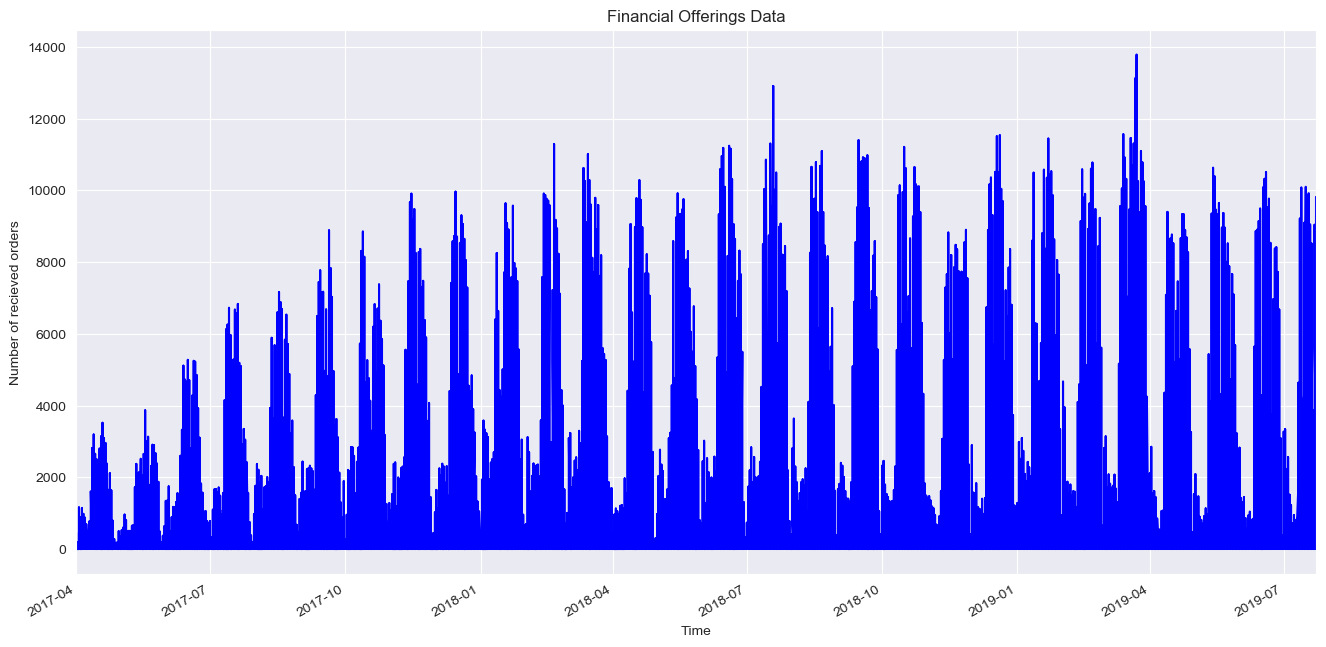

In [5]:
plt.figure(figsize=(16,8), dpi=100)
train_data['case_count'].plot(color='b')
plt.xlabel('Time')
plt.ylabel('Number of recieved orders')
plt.title('Financial Offerings Data')
plt.show()

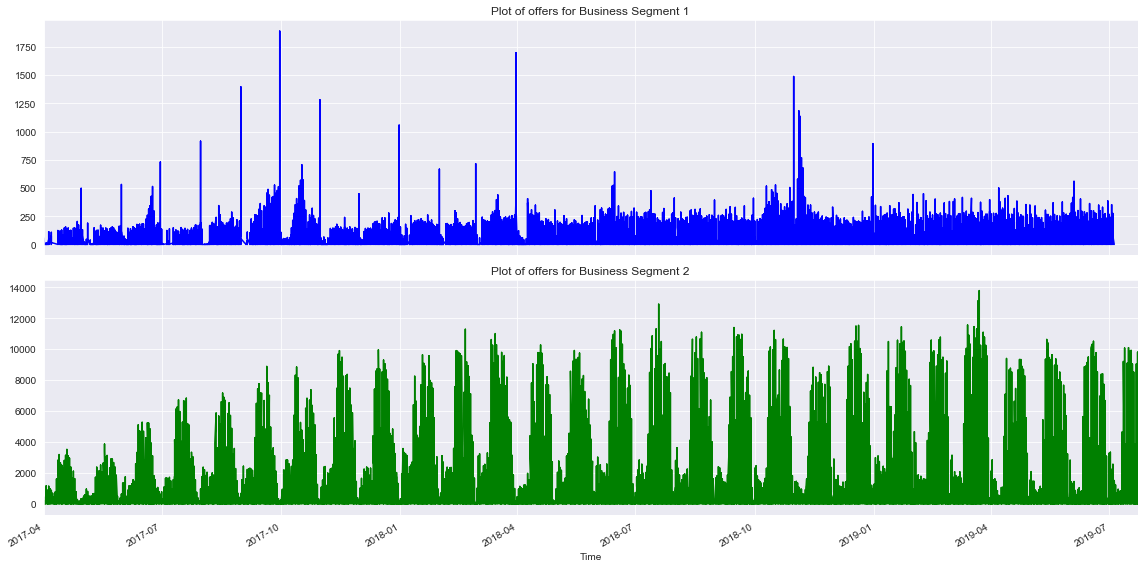

In [6]:
## Financial offering of two business segments
train_segment1 = train_data[train_data['segment'] == 1]
train_segment2 = train_data[train_data['segment'] == 2]
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(16, 8), sharex=True)
train_segment1['case_count'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Plot of offers for Business Segment 1')
train_segment2['case_count'].plot(ax=axarr[1], color='g')
axarr[1].set_title('Plot of offers for Business Segment 2')
plt.xlabel('Time')
plt.tight_layout()
plt.show()

## Time Series Decomposition

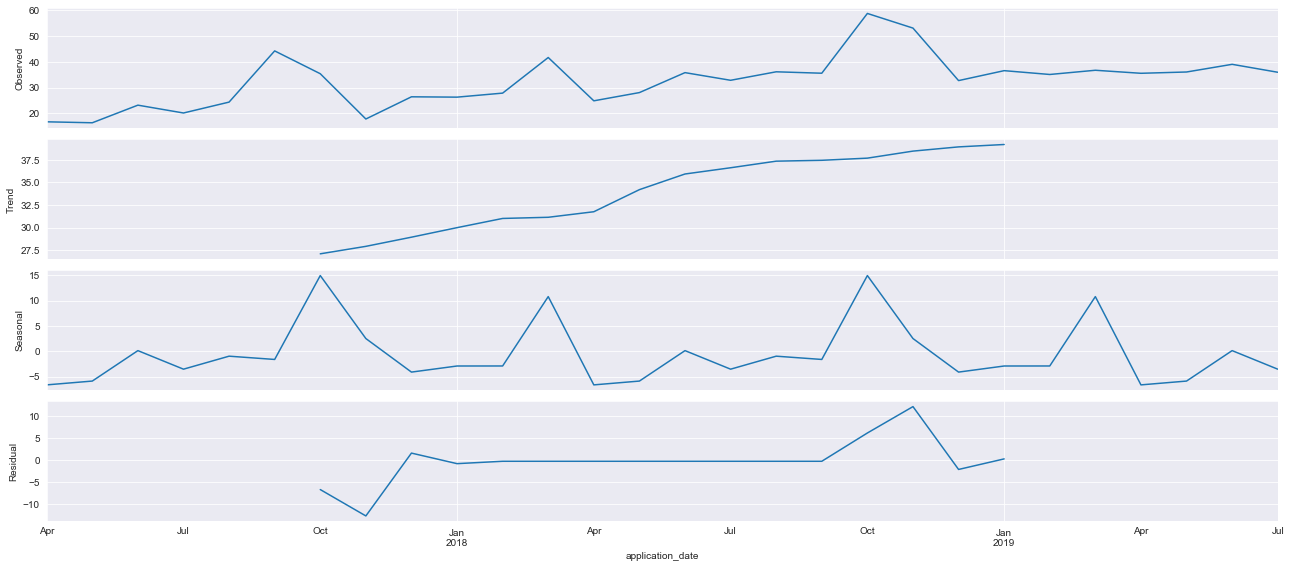

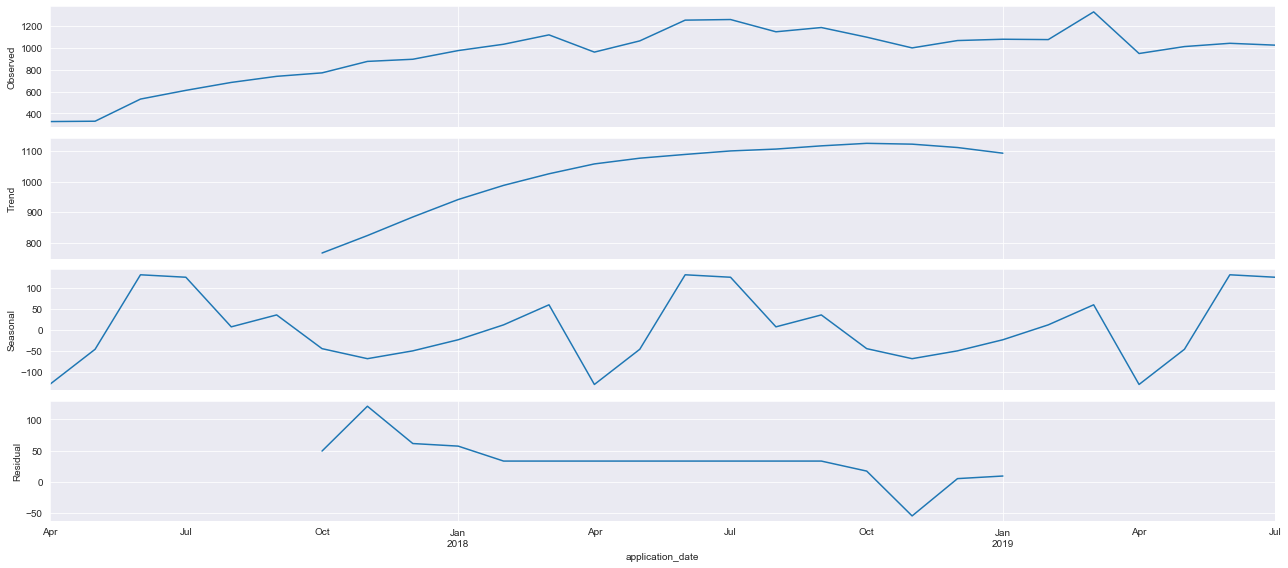

In [7]:
month_avg_train_segment1 = train_segment1['case_count'].resample('MS').mean()
month_avg_train_segment2 = train_segment2['case_count'].resample('MS').mean()

rcParams['figure.figsize'] = 18, 8
decompose_segment1 = seasonal.seasonal_decompose(month_avg_train_segment1, model='additive')
decompose_segment2 = seasonal.seasonal_decompose(month_avg_train_segment2, model='additive')
fig1 = decompose_segment1.plot()
fig2 = decompose_segment2.plot()
plt.show()

## Test Stationarity of The Time Series

In [9]:
stationarity_stat_segment1 = stattools.adfuller(train_segment1['case_count'], autolag='AIC')
stationarity_stat_segment2 = stattools.adfuller(train_segment1['case_count'], autolag='AIC')

print('ADF Statistics For Segment 1:', stationarity_stat_segment1[0])
print('p-value for Segment 1: %.5f' % stationarity_stat_segment1[1])

print('ADF Statistics For Segment 2:', stationarity_stat_segment2[0])
print('p-value for Segment 2: %.5f' % stationarity_stat_segment2[1])

ADF Statistics For Segment 1: -8.817435628592063
p-value for Segment 1: 0.00000
ADF Statistics For Segment 2: -8.817435628592063
p-value for Segment 2: 0.00000


So it is clear the time series is perfectly non-stationary

## Detrending The Time Series

Text(0.5, 1.0, 'Number of Recieved offers Detrended By Least Square Fit')

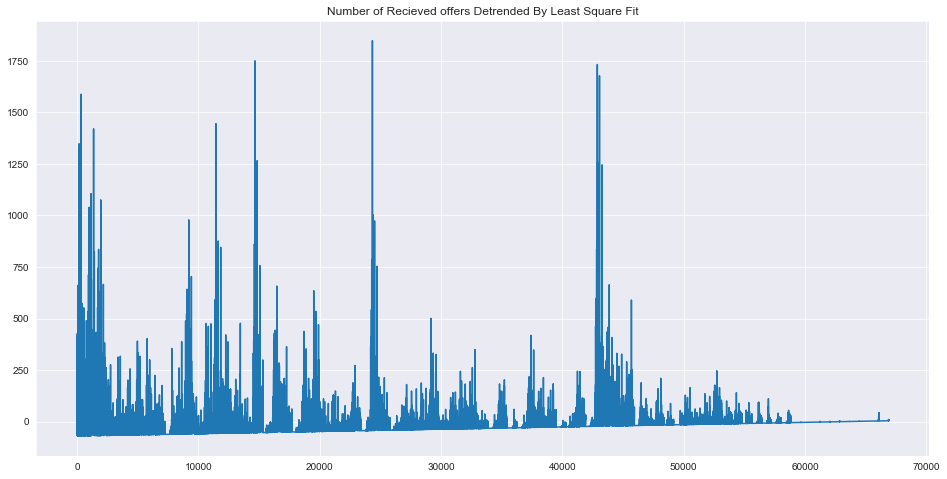

In [14]:
detrendedBylsf_segment1 = signal.detrend(train_segment1['case_count'])
plt.figure(figsize=(16,8))
plt.plot(detrendedBylsf_segment1)
plt.title('Number of Recieved offers In Segment 1 Detrended By Least Square Fit')

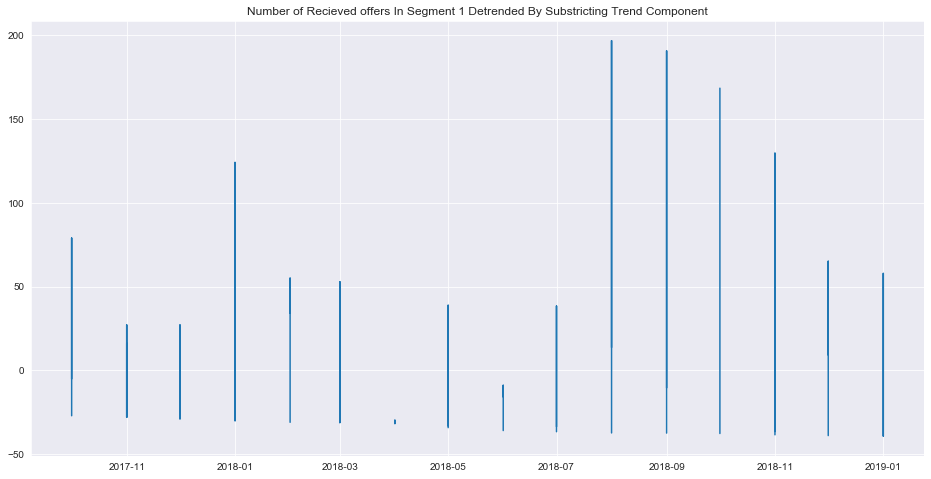

In [16]:
detrendedByTrend_segment1 = train_segment1['case_count'] - decompose_segment1.trend
plt.figure(figsize=(16,8))
plt.plot(detrendedByTrend_segment1)
plt.title('Number of Recieved offers In Segment 1 Detrended By Substricting Trend Component')
plt.show()

Text(0.5, 1.0, 'Number of Recieved offers In Segment 2 Detrended By Least Square Fit')

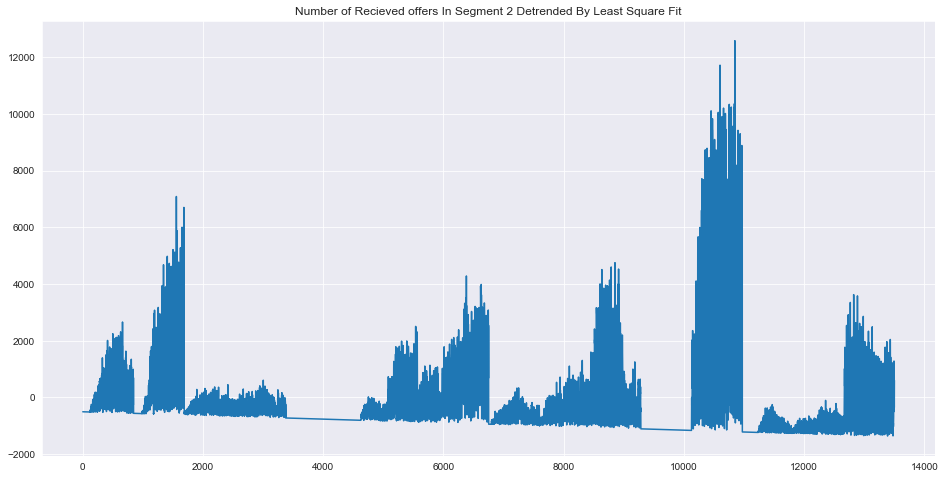

In [17]:
detrendedBylsf_segment2 = signal.detrend(train_segment2['case_count'])
plt.figure(figsize=(16,8))
plt.plot(detrendedBylsf_segment2)
plt.title('Number of Recieved offers In Segment 2 Detrended By Least Square Fit')

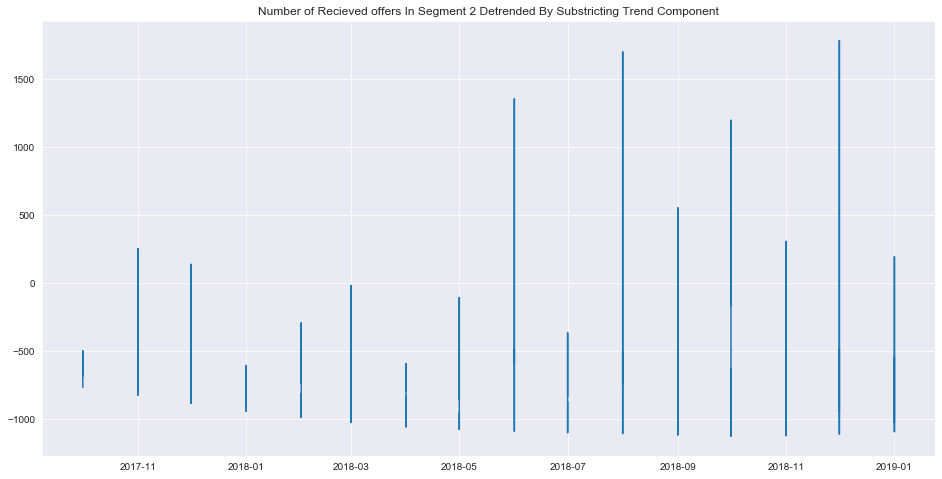

In [18]:
detrendedByTrend_segment2 = train_segment2['case_count'] - decompose_segment2.trend
plt.figure(figsize=(16,8))
plt.plot(detrendedByTrend_segment2)
plt.title('Number of Recieved offers In Segment 2 Detrended By Substricting Trend Component')
plt.show()

## Deseasonalize The Time Sereies

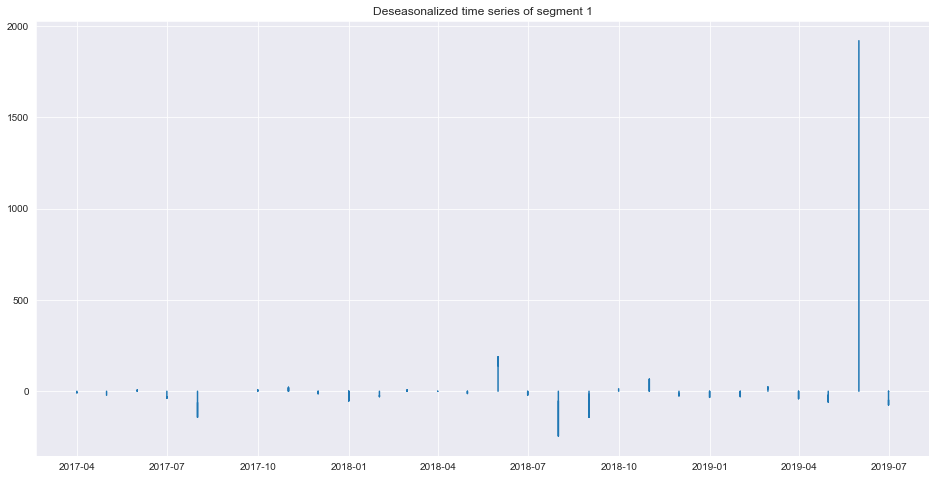

In [22]:
deseasonalized_segment1 = train_segment1['case_count'] / decompose_segment1.seasonal

plt.figure(figsize=(16,8))
plt.plot(deseasonalized_segment1)
plt.title("Deseasonalized time series of segment 1")
plt.show()

## Auto-Correlation Plot of The Time Series

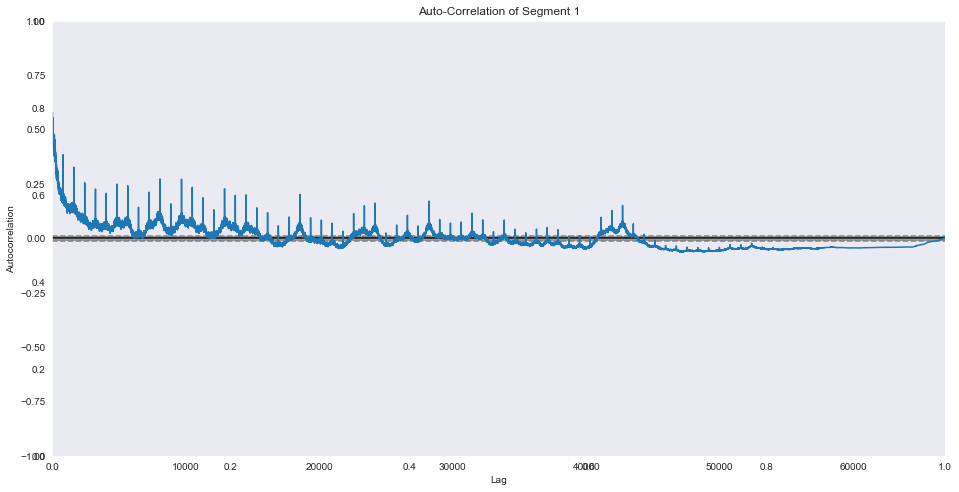

In [29]:
plt.rcParams.update({
    'figure.figsize': (16,8)
})
plt.title('Auto-Correlation of Segment 1')
autocorrelation_plot(train_segment1['case_count'])
plt.show()

## Auto-Correlation And Partial Auto-Correlation

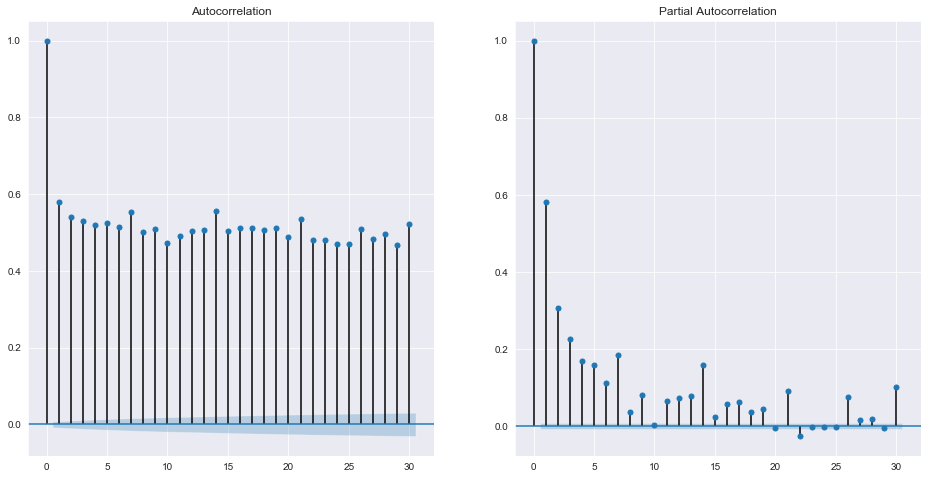

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plot_acf(train_segment1['case_count'].to_list(), lags=30, ax=axes[0])
plot_pacf(train_segment1['case_count'].to_list(), lags=30, ax=axes[1])
plt.show()

## Differencing The Time Series

In [43]:
plt.rcParams.update({'figure.figsize': (16,7)})

# Original Series
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train_segment1['case_count'])
axes[0].set_title('Original Series')
plot_acf(train_segment1['case_count'], ax=axes[1])

plt.show()

ValueError: view limit minimum -36862.25 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [ ]:
# 1st Differenncing
axes[1,0].plot(train_segment1['case_count'].diff())
axes[1,0].set_title('First Differencing')
plot_acf(train_segment1['case_count'].diff().dropna(), ax= axes[1,1])